In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [122]:
df = pd.read_csv("/content/winequality.csv")
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
86,8.6,0.490,0.28,1.9,0.110,20,136,0.9972,2.93,1.95,9.9
134,7.9,1.040,0.05,2.2,0.084,13,29,0.9959,3.22,0.55,9.9
56,10.2,0.420,0.57,3.4,0.070,4,10,0.9971,3.04,0.63,9.6
11,7.5,0.500,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5
110,7.8,0.560,0.19,1.8,0.104,12,47,0.9964,3.19,0.93,9.5
70,7.7,0.630,0.08,1.9,0.076,15,27,0.9967,3.32,0.54,9.5
23,8.5,0.490,0.11,2.3,0.084,9,67,0.9968,3.17,0.53,9.4
20,8.9,0.220,0.48,1.8,0.077,29,60,0.9968,3.39,0.53,9.4
35,7.8,0.645,0.00,5.5,0.086,5,18,0.9986,3.40,0.55,9.6
121,8.8,0.550,0.04,2.2,0.119,14,56,0.9962,3.21,0.60,10.9


In [123]:
### STATISTICAL SUMMARY (Excluding NaN)
df.describe()
display(df.describe())
### STATISTICAL SUMMARY (Including NaN)
df.describe(include='all')
display(df.describe(include='all'))

""" Noticed that the weren't statistical summary for NaN /n
This may be bcos of NaN doesn't even exist in the dataset to confirm this I decided to check the missing value below
"""

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,7.617105,0.572730,0.215395,2.308553,0.102671,15.486842,58.236842,0.996623,3.330855,0.697500,9.859868
std,1.055592,0.183557,0.187107,1.138821,0.077980,9.768843,36.618986,0.001230,0.165281,0.283328,0.874227
min,4.600000,0.220000,0.000000,1.200000,0.045000,3.000000,10.000000,0.991600,2.740000,0.390000,9.000000
25%,7.075000,0.450000,0.070000,1.800000,0.074750,9.000000,29.000000,0.996200,3.217500,0.547500,9.400000
50%,7.800000,0.560000,0.180000,2.000000,0.082000,13.000000,52.000000,0.996800,3.335000,0.600000,9.500000
75%,8.200000,0.670000,0.300000,2.300000,0.097000,19.000000,83.500000,0.997200,3.420000,0.770000,10.125000
max,11.200000,1.330000,1.000000,10.700000,0.610000,52.000000,153.000000,0.999600,3.900000,2.000000,14.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,7.617105,0.572730,0.215395,2.308553,0.102671,15.486842,58.236842,0.996623,3.330855,0.697500,9.859868
std,1.055592,0.183557,0.187107,1.138821,0.077980,9.768843,36.618986,0.001230,0.165281,0.283328,0.874227
min,4.600000,0.220000,0.000000,1.200000,0.045000,3.000000,10.000000,0.991600,2.740000,0.390000,9.000000
25%,7.075000,0.450000,0.070000,1.800000,0.074750,9.000000,29.000000,0.996200,3.217500,0.547500,9.400000
50%,7.800000,0.560000,0.180000,2.000000,0.082000,13.000000,52.000000,0.996800,3.335000,0.600000,9.500000
75%,8.200000,0.670000,0.300000,2.300000,0.097000,19.000000,83.500000,0.997200,3.420000,0.770000,10.125000
max,11.200000,1.330000,1.000000,10.700000,0.610000,52.000000,153.000000,0.999600,3.900000,2.000000,14.000000


" Noticed that the weren't statistical summary for NaN /n\nThis may be bcos of NaN doesn't even exist in the dataset to confirm this I decided to check the missing value below\n"

In [124]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         152 non-null    float64
 1   volatile acidity      152 non-null    float64
 2   citric acid           152 non-null    float64
 3   residual sugar        152 non-null    float64
 4   chlorides             152 non-null    float64
 5   free sulfur dioxide   152 non-null    int64  
 6   total sulfur dioxide  152 non-null    int64  
 7   density               152 non-null    float64
 8   pH                    152 non-null    float64
 9   sulphates             152 non-null    float64
 10  alcohol               152 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 13.2 KB


None

In [125]:
missing_summary = pd.DataFrame({
    'Missing Exists': df.isna().any(),
    'Missing Count': df.isna().sum()
})
print(missing_summary)

                      Missing Exists  Missing Count
fixed acidity                  False              0
volatile acidity               False              0
citric acid                    False              0
residual sugar                 False              0
chlorides                      False              0
free sulfur dioxide            False              0
total sulfur dioxide           False              0
density                        False              0
pH                             False              0
sulphates                      False              0
alcohol                        False              0


In [126]:
df_clean = df.copy()
for c in df_clean.columns:
    if pd.api.types.is_numeric_dtype(df_clean[c]):
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())
    else:
        df_clean[c] = df_clean[c].fillna(df_clean[c].mode().iloc[0])
df_clean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
147,7.6,0.49,0.26,1.6,0.236,10,88,0.9968,3.11,0.80,9.3
148,6.9,0.49,0.10,2.3,0.074,12,30,0.9959,3.42,0.58,10.2
149,8.2,0.40,0.44,2.8,0.089,11,43,0.9975,3.53,0.61,10.5
150,7.3,0.33,0.47,2.1,0.077,5,11,0.9958,3.33,0.53,10.3


In [127]:

### Outlier check
def iqr_count(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    return int(((s < lo) | (s > hi)).sum())

outlier_counts = {c: iqr_count(df_clean[c]) for c in df_clean.select_dtypes("number").columns}
outlier_counts = dict(sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True))
outlier_counts

{'residual sugar': 15,
 'density': 14,
 'chlorides': 13,
 'sulphates': 12,
 'fixed acidity': 9,
 'free sulfur dioxide': 8,
 'volatile acidity': 6,
 'alcohol': 6,
 'pH': 4,
 'citric acid': 3,
 'total sulfur dioxide': 0}

In [128]:
outlier_summary = (
    df_clean.select_dtypes("number")
           .apply(iqr_count)
           .sort_values(ascending=False)
)
display(outlier_summary)

,0
residual sugar,15
density,14
chlorides,13
sulphates,12
fixed acidity,9
free sulfur dioxide,8
volatile acidity,6
alcohol,6
pH,4
citric acid,3


In [129]:
feature_cols = [c for c in df_clean.columns if c != label_col]
X_raw = df_clean[feature_cols]
X_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
147,7.6,0.49,0.26,1.6,0.236,10,88,0.9968,3.11,0.80,9.3
148,6.9,0.49,0.10,2.3,0.074,12,30,0.9959,3.42,0.58,10.2
149,8.2,0.40,0.44,2.8,0.089,11,43,0.9975,3.53,0.61,10.5
150,7.3,0.33,0.47,2.1,0.077,5,11,0.9958,3.33,0.53,10.3


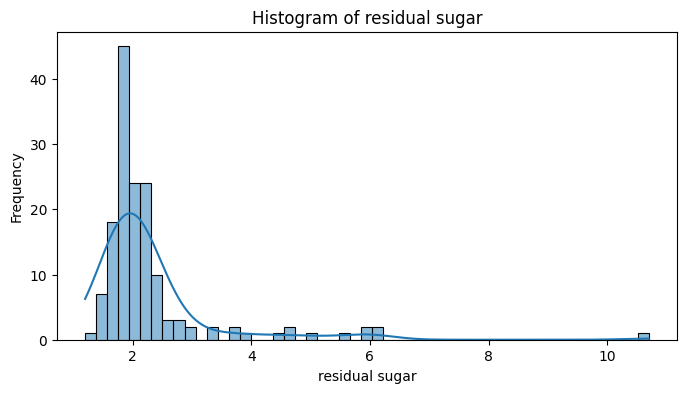

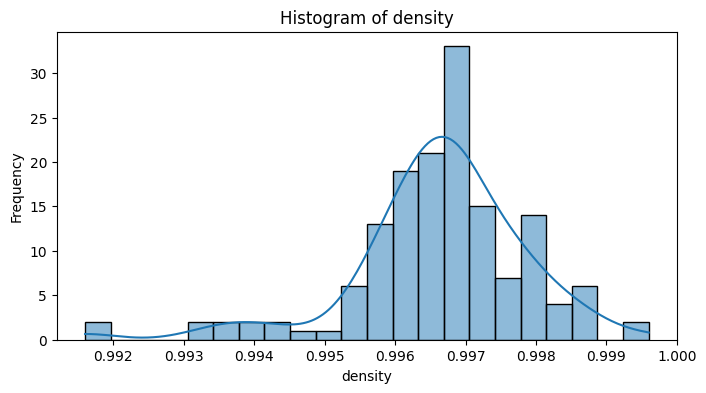

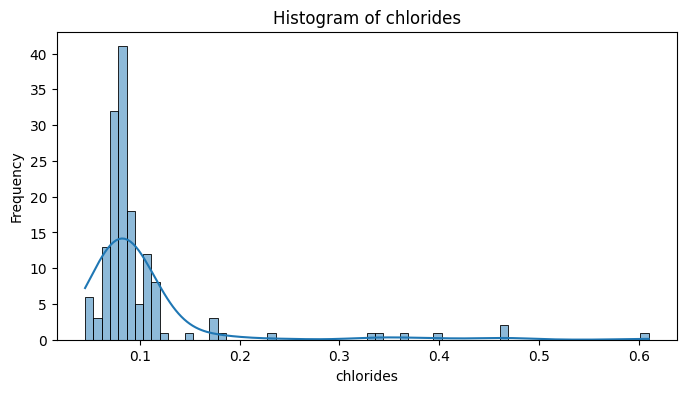

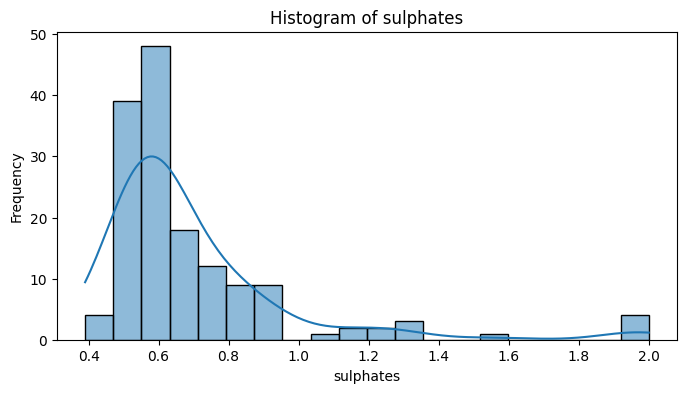

In [130]:

# Columns with the most outliers based on the previous analysis
cols_with_most_outliers = ['residual sugar', 'density', 'chlorides', 'sulphates']

# Create histograms for each of these columns
for col in cols_with_most_outliers:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_clean, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

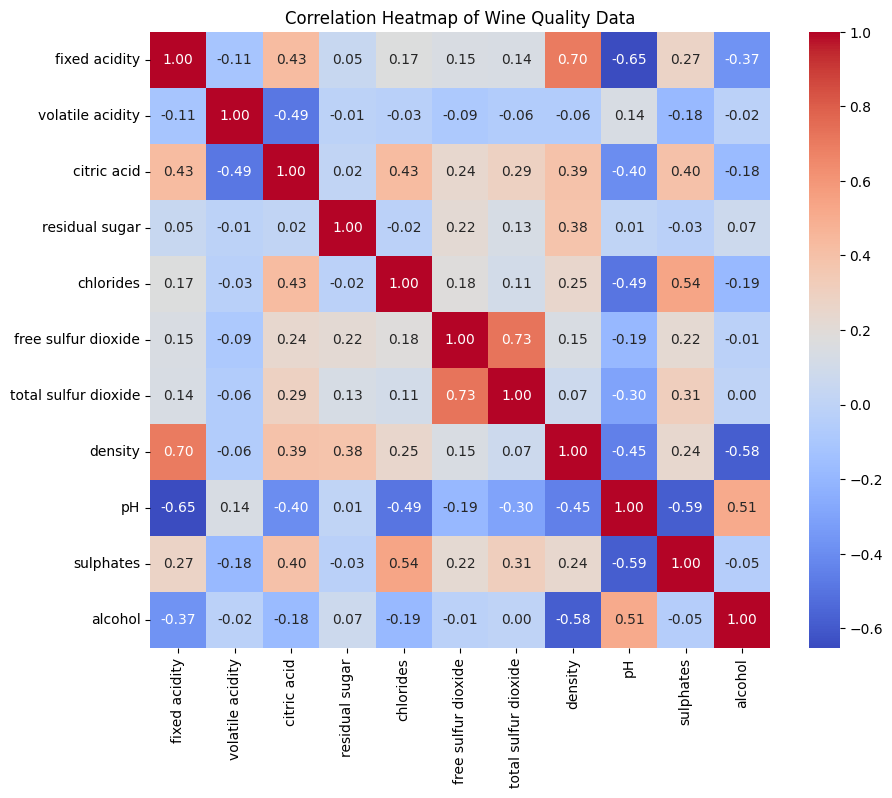

In [131]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Quality Data')
plt.show()

In [132]:
from sklearn.preprocessing import StandardScaler

# ---------- 4) Scale ----------
label_col = 'quality' # Replace with your actual target column name if it exists
feature_cols = [c for c in df_clean.columns if c != label_col]
X = df_clean[feature_cols].values
X = StandardScaler().fit_transform(X)

In [133]:
# ---------- 5) PCA (2D for viz) ----------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
pca_var = pca.explained_variance_ratio_
pca_var

array([0.33738238, 0.15795022])

In [134]:
# ---------- 6) Tune k (fast, robust) ----------
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Use a small sample for speed
n = X.shape[0]
sample_n = min(1500, n)
rng = np.random.default_rng(42)
idx = rng.choice(n, size=sample_n, replace=False)
Xs = X[idx]

k_range = list(range(2, 9))
kmeans_sil, kmeans_inertia, agg_sil = [], [], []

for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(Xs)
    kmeans_inertia.append(km.inertia_)
    kmeans_sil.append(silhouette_score(Xs, km.labels_))
    agg = AgglomerativeClustering(n_clusters=k, linkage="ward").fit(Xs)
    agg_sil.append(silhouette_score(Xs, agg.labels_))

best_k_km  = k_range[int(np.argmax(kmeans_sil))]
best_k_agg = k_range[int(np.argmax(agg_sil))]
best_k_agg

4

In [135]:
# ---------- 7) Final models on full data ----------
labels_km  = KMeans(n_clusters=best_k_km,  n_init=10, random_state=42).fit_predict(X)
labels_agg = AgglomerativeClustering(n_clusters=best_k_agg, linkage="ward").fit_predict(X)

sil_km  = silhouette_score(X, labels_km)
sil_agg = silhouette_score(X, labels_agg)
sil_agg


np.float64(0.3053663327445235)

In [136]:
# ---------- 8) Cluster profiles ----------
def profile(df_full, labels, feats):
    tmp = df_full.copy()
    tmp["_cluster"] = labels
    g = tmp.groupby("_cluster")
    prof = g[feats].mean().round(3)
    prof["count"] = g[feats[0]].count()
    return prof

prof_km  = profile(df_clean, labels_km,  feature_cols)
prof_agg = profile(df_clean, labels_agg, feature_cols)


In [137]:
display(prof_km)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,count
_cluster,,,,,,,,,,,,
0,8.373,0.489,0.409,2.771,0.147,23.778,88.000,0.998,3.218,0.907,9.662,45
1,5.129,0.546,0.077,2.000,0.051,22.000,82.857,0.993,3.731,0.640,12.929,7
2,7.451,0.612,0.138,2.122,0.086,11.300,43.120,0.996,3.354,0.607,9.734,100


In [138]:
display(prof_agg)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,count
_cluster,,,,,,,,,,,,
0,8.419,0.483,0.404,2.997,0.097,25.028,93.500,0.998,3.264,0.824,9.750,36
1,7.458,0.616,0.137,2.092,0.086,11.757,44.748,0.996,3.349,0.615,9.720,103
2,5.150,0.467,0.083,2.100,0.052,18.833,82.500,0.993,3.728,0.667,13.333,6
3,7.943,0.486,0.519,2.129,0.426,18.429,54.571,0.997,3.067,1.284,9.500,7


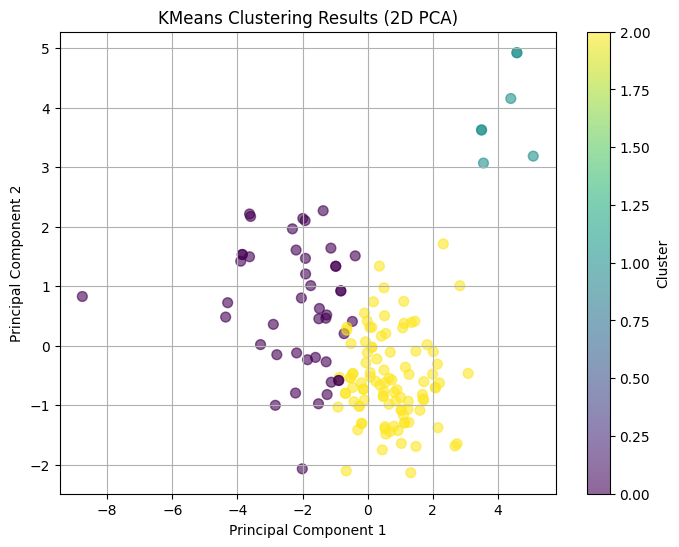

In [139]:
# Visualize the clusters using PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_km, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title('KMeans Clustering Results (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [140]:
import os

# Defining the output directory for plots
OUTDIR = 'your_output_directory' # Replacing with my desired output directory
os.makedirs(OUTDIR, exist_ok=True) # Creating the output directory if it doesn't exist

#### Plots

# Corrected k_range for plotting inertia
plot_k_range_inertia = list(range(2, 9))

plt.figure(); plt.plot(plot_k_range_inertia, kmeans_inertia, marker="o")
plt.title("Elbow (KMeans inertia vs k)"); plt.xlabel("k"); plt.ylabel("Inertia");
elbow_png = os.path.join(OUTDIR, "elbow.png"); plt.tight_layout(); plt.savefig(elbow_png, dpi=140); plt.close()

# Define k_range for silhouette plotting
k_range = list(range(2, 9))

plt.figure();
plt.plot(k_range, kmeans_sil, marker="o", label="KMeans")
plt.plot(k_range, agg_sil, marker="o", label="Agglomerative")
plt.title("Silhouette vs k"); plt.xlabel("k"); plt.ylabel("Silhouette"); plt.legend();
sil_png = os.path.join(OUTDIR, "silhouette.png"); plt.tight_layout(); plt.savefig(sil_png, dpi=140); plt.close()

plt.figure(); plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_km)
plt.title(f"PCA scatter – KMeans (k={best_k_km}, silhouette={sil_km:.3f})"); plt.xlabel("PC1"); plt.ylabel("PC2");
km_png = os.path.join(OUTDIR, "pca_kmeans.png"); plt.tight_layout(); plt.savefig(km_png, dpi=140); plt.close()

plt.figure(); plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_agg)
plt.title(f"PCA scatter – Agglomerative (k={best_k_agg}, silhouette={sil_agg:.3f})"); plt.xlabel("PC1"); plt.ylabel("PC2");
agg_png = os.path.join(OUTDIR, "pca_agg.png"); plt.tight_layout(); plt.savefig(agg_png, dpi=140); plt.close()

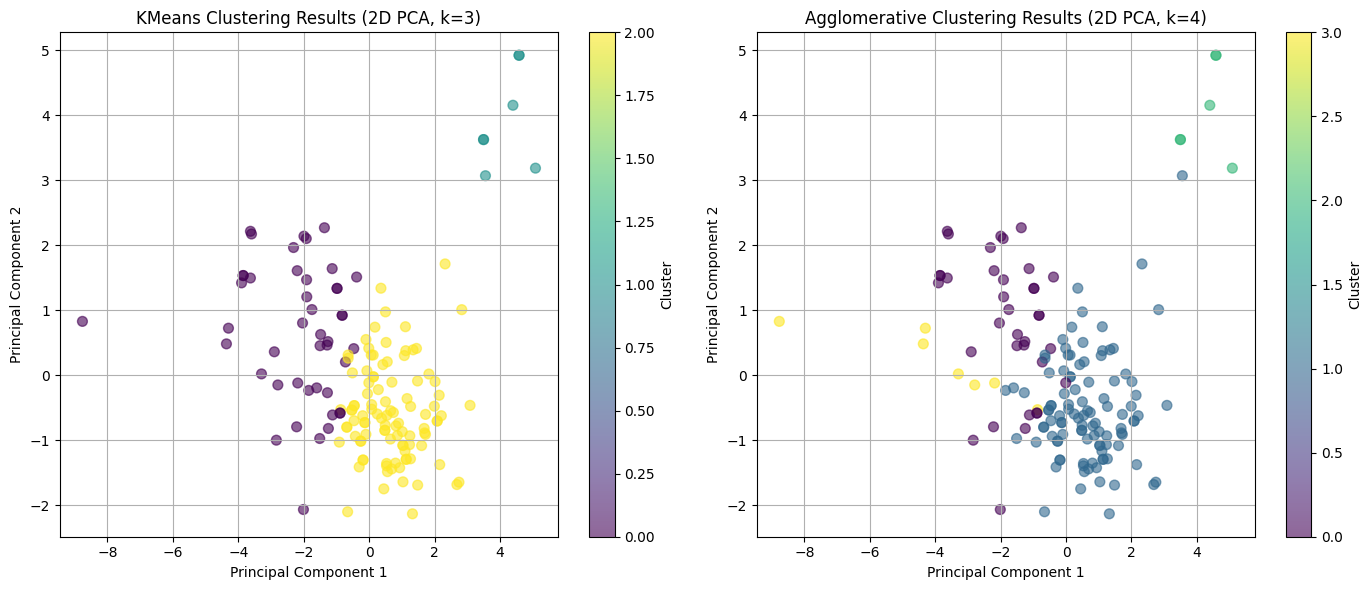

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KMeans Plot
scatter_km = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_km, cmap='viridis', marker='o', s=50, alpha=0.6)
axes[0].set_title(f'KMeans Clustering Results (2D PCA, k={best_k_km})')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].grid(True)
fig.colorbar(scatter_km, ax=axes[0], label='Cluster')


# Agglomerative Clustering Plot
scatter_agg = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_agg, cmap='viridis', marker='o', s=50, alpha=0.6)
axes[1].set_title(f'Agglomerative Clustering Results (2D PCA, k={best_k_agg})')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].grid(True)
fig.colorbar(scatter_agg, ax=axes[1], label='Cluster')


plt.tight_layout()
plt.show()

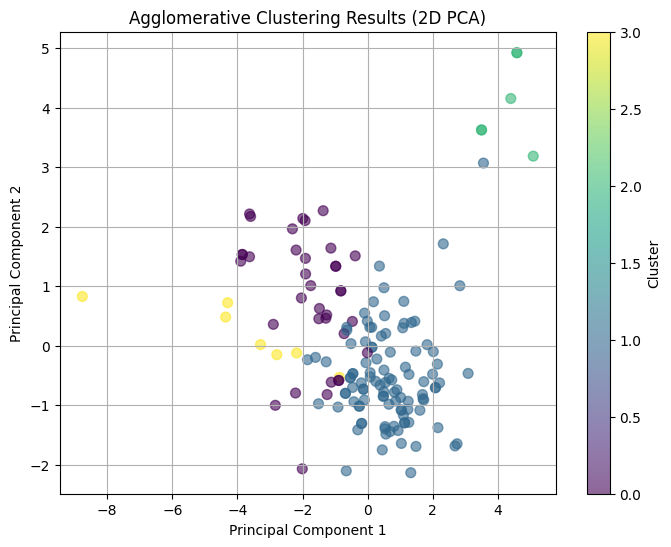

In [142]:
# Visualize the clusters using PCA results (Agglomerative Clustering)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_agg, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title('Agglomerative Clustering Results (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

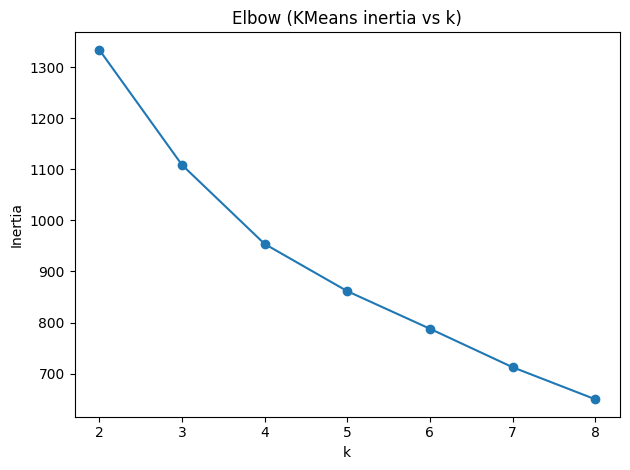

In [143]:
plt.figure(); plt.plot(k_range, kmeans_inertia, marker="o")
plt.title("Elbow (KMeans inertia vs k)"); plt.xlabel("k"); plt.ylabel("Inertia");
plt.tight_layout(); plt.show()

In [144]:
from sklearn.mixture import GaussianMixture
# training ONE gmm at k=best_k_km for reference:
gmm = GaussianMixture(n_components=best_k_km, covariance_type="full", random_state=42).fit(X)
gmm_labels = gmm.predict(X)
gmm_sil = silhouette_score(X, gmm_labels)
print("GMM (k = best_k_km) silhouette:", round(gmm_sil, 3))


GMM (k = best_k_km) silhouette: 0.145


In [145]:
# --- JUST HIERARCHICAL (Agglomerative/Ward) ---

import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 1) Pick k via silhouette (tune on a sample for speed)
k_range = range(2, 11)
n = X.shape[0]
rng = np.random.default_rng(42)
idx = rng.choice(n, size=min(1500, n), replace=False)   # sample for tuning
Xs = X[idx]

sil_scores = []
for k in k_range:
    labels_s = AgglomerativeClustering(n_clusters=k, linkage="ward").fit_predict(Xs)
    sil_scores.append(silhouette_score(Xs, labels_s))

best_k = list(k_range)[int(np.argmax(sil_scores))]
print(f"Best k (sample): {best_k} | silhouette={max(sil_scores):.3f}")

# 2) Final fit on FULL data
agg = AgglomerativeClustering(n_clusters=best_k, linkage="ward")
labels_agg = agg.fit_predict(X)
sil_full = silhouette_score(X, labels_agg)
print(f"Full-data silhouette (Agglomerative, k={best_k}): {sil_full:.3f}")

# 3) Quick cluster profile (means; post-hoc quality if present)
tmp = df_clean.copy()
tmp["_cluster"] = labels_agg
profile_agg = tmp.groupby("_cluster")[feature_cols].mean().round(3)
profile_agg["count"] = tmp.groupby("_cluster").size()
if "quality" in tmp.columns:
    profile_agg["avg_quality_(posthoc)"] = tmp.groupby("_cluster")["quality"].mean().round(3)

print(profile_agg)


Best k (sample): 4 | silhouette=0.305
Full-data silhouette (Agglomerative, k=4): 0.305
          fixed acidity  volatile acidity  citric acid  residual sugar  \
_cluster                                                                 
0                 8.419             0.483        0.404           2.997   
1                 7.458             0.616        0.137           2.092   
2                 5.150             0.467        0.083           2.100   
3                 7.943             0.486        0.519           2.129   

          chlorides  free sulfur dioxide  total sulfur dioxide  density  \
_cluster                                                                  
0             0.097               25.028                93.500    0.998   
1             0.086               11.757                44.748    0.996   
2             0.052               18.833                82.500    0.993   
3             0.426               18.429                54.571    0.997   

             pH  

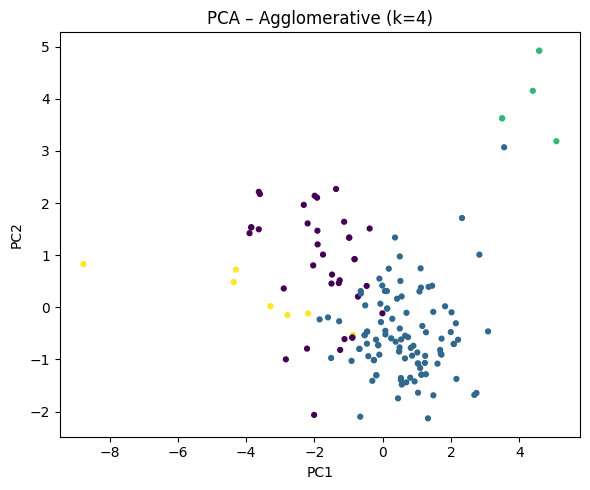

In [146]:
# --- PCA scatter for Agglomerative clusters ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Using numeric features for clustering:
feature_cols = df_clean.select_dtypes("number").columns.tolist()
X = StandardScaler().fit_transform(df_clean[feature_cols])

# Using k via silhouette on a sample, then refit on full
k_range = range(2, 11)
rng = np.random.default_rng(42)
idx = rng.choice(X.shape[0], size=min(1500, X.shape[0]), replace=False)
Xs = X[idx]

sil = []
for k in k_range:
    labels_s = AgglomerativeClustering(n_clusters=k, linkage="ward").fit_predict(Xs)
    sil.append(silhouette_score(Xs, labels_s))
best_k = list(k_range)[int(np.argmax(sil))]

# Final fit on full data
labels_agg = AgglomerativeClustering(n_clusters=best_k, linkage="ward").fit_predict(X)

# PCA for plotting
X_pca = PCA(n_components=2, random_state=42).fit_transform(X)

# Scatter
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_agg, s=12)
plt.title(f"PCA – Agglomerative (k={best_k})")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()


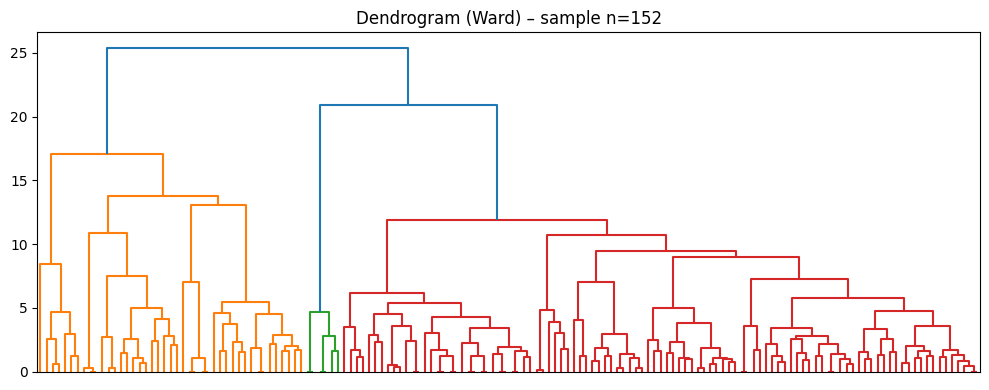

In [147]:
# --- Dendrogram (sampled) ---
from scipy.cluster.hierarchy import linkage, dendrogram

# Sample (keeping it small so it renders nicely)
rng = np.random.default_rng(42)
sample_n = min(300, X.shape[0])
ids = rng.choice(X.shape[0], size=sample_n, replace=False)

Z = linkage(X[ids], method="ward")
plt.figure(figsize=(10, 4))
dendrogram(Z, no_labels=True, count_sort=True)
plt.title(f"Dendrogram (Ward) – sample n={sample_n}")
plt.tight_layout()
plt.show()
